In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [36]:
data = pd.read_excel('weather_features_simplified3.xlsx')
data.drop(['TIME', 'city_name'], axis=1, inplace=True)

# Exploration

In [38]:
from sklearn.metrics import r2_score
for  i in data.columns: 
    print(f"Korelasi total load actual dan {i} = {r2_score(data[i], data['total load actual'])}")

Korelasi total load actual dan temp (K) = -15697013.21629405
Korelasi total load actual dan humidity = -2298498.7410414945
Korelasi total load actual dan wind_speed = -145658113.83848697
Korelasi total load actual dan rain_3h = -3163453275540559.0
Korelasi total load actual dan total load actual = 1.0


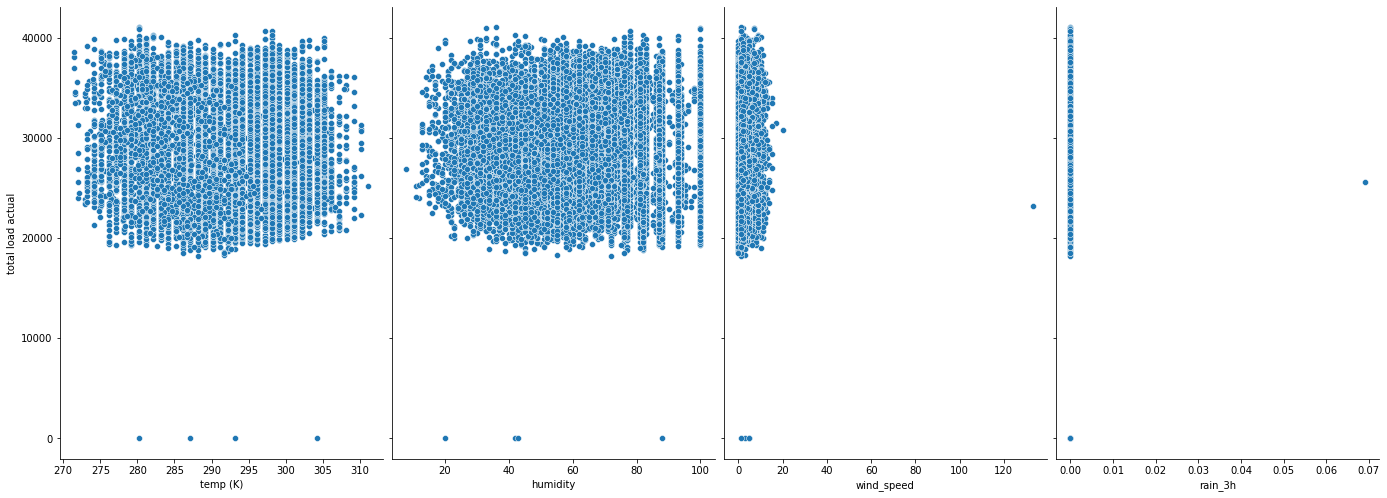

In [24]:
sns.pairplot(data, x_vars=data.drop('total load actual', axis=1).columns.tolist(), y_vars='total load actual',height=7, aspect=0.7, kind='scatter')

<AxesSubplot:>

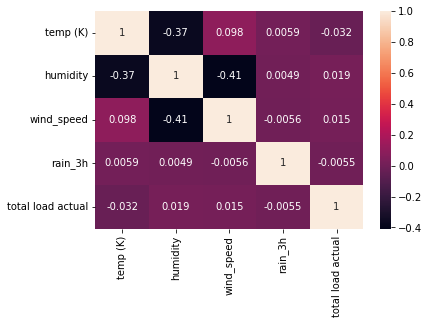

In [17]:
sns.heatmap(data.corr(), annot=True)

# Preprocessing

In [41]:
# Putting feature variable to X
X = data['temp (K)']

# Putting response variable to y
y = data['total load actual']

X.head()

0    279.15
1    279.15
2    279.15
3    277.15
4    278.15
Name: temp (K), dtype: float64

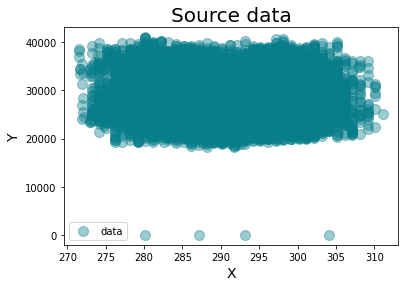

In [86]:
plt.scatter(X, y, s=100, c='#087E8B', alpha=0.4, label='data') # s=ukuranMarker, c=color, alpha=transparency
plt.title('Source data', size=20)                 # size= ukuran font
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend() 
plt.show()

# Model

In [68]:
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None     # b0 dan b1 adalah variabel bebas dari garis yg kita cari

    def fit(self, X, y):   # ini tahapan untuk "training"
        ''' 
        Use calculus to calculate SLOPE and intercept Coefficients: y = b0 + b1x

        :param X: array, single feature
        :param y: array, true values
        :return: None    
        '''
        numerator   = np.sum( (X - np.mean(X))*(y - np.mean(y)) ) # formula pembilang
        denominator = np.sum((X - np.mean(X))**2 )                # formula pembagi
        self.b1     = numerator/denominator                       # lihat expresi ini dipenjelasan web nya
        self.b0     = np.mean(y) - self.b1*np.mean(X)              

    def predict(self, X): # untuk menghitung prediksi nilai y dengan input X
        '''
        Make predictions using the simple line equation
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X,y)` before making predictions.')
        return self.b0 + self.b1*X

# Training#1
Menggunakan Simple Linear Regression

In [80]:
# for validation, we split between training data and testing data
# use sklearn package
from sklearn.model_selection import train_test_split

# test = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Training testing process:
model     = SimpleLinearRegression()    # inialization process
model.fit(X_train, y_train)             # training process, output: coef b0 & b1
preds     = model.predict(X_test)       # prediction process, input: X_test, ouput: y_prediction

In [81]:
operator = '+' if model.b0>0 else '-'
print(f"Persamaan Garis dari Model Simple Linear Regression: y={model.b1}x{operator}{abs(model.b0)}")

Persamaan Garis dari Model Linear Regression: y=-26.446261816628546x+36661.08738510358


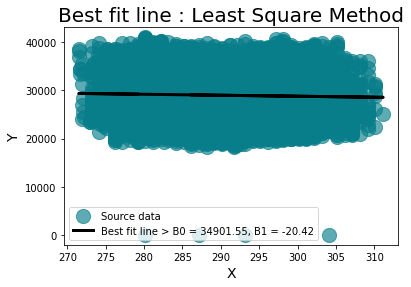

In [74]:
model_all = SimpleLinearRegression()
model_all.fit(X,y)                       # bangun kembali model dengan semua data
preds_all = model_all.predict(X)         # membangun model prediksi

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')   # plot scatter
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line : Least Square Method', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()                 # menunjukkan label
plt.show()

In [82]:
from sklearn.metrics import mean_squared_error  # import rmse from sklearn
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))   # definisikan y sbg variable?
rmse(y_test, preds)

4673.2333706092495

# Training#2
Menggunakan Library Scikit Learn

In [89]:
# Now we will compare with SCIKIT-LEARN: LinearRegression
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()                               # initialization
sk_model.fit(np.array(X_train).reshape(-1,1), y_train)      # training the model
sk_preds = sk_model.predict(np.array(X_test).reshape(-1,1)) # testing process, input: testing data

In [90]:
operator = '+' if sk_model.intercept_>0 else '-'
print(f"Persamaan Garis dari Model Sklearn Linear Regression: y={sk_model.coef_ [0]}x{operator}{abs(sk_model.intercept_)}")

Persamaan Garis dari Model Sklearn Linear Regression: y=-26.446261816628528x+36661.08738510357


In [84]:
# hitung akurasi melalui RMSE untuk hasil dari SCIKIT-LEARN:
rmse(y_test, sk_preds)
# hasil nya hampir sama dengan perhitungan di atas.

4673.2333706092495